# Data Analysis How-To Report





An overly lengthy yet detailed road to basic data analysis. 
To be edited before adding to portfolio.
### Aggregation into one Data Frame

In [1]:
import numpy as np                                      
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
pd.options.display.max_rows = 100

In [2]:
file1 = pd.read_csv('Data/file1.csv')
file2 = pd.read_csv('Data/file2.csv')
file3 = pd.read_csv('Data/file3.csv')
   

In [3]:
file1.head()

,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323


### Unification of Columns

In [4]:
list(file1.columns)           #check all columns so can see if different to other files and if need to be changed & unified.

['Customer',
 'ST',
 'GENDER',
 'Education',
 'Customer Lifetime Value',
 'Income',
 'Monthly Premium Auto',
 'Number of Open Complaints',
 'Policy Type',
 'Vehicle Class',
 'Total Claim Amount']

In [5]:
list(file2.columns)

['Customer',
 'ST',
 'GENDER',
 'Education',
 'Customer Lifetime Value',
 'Income',
 'Monthly Premium Auto',
 'Number of Open Complaints',
 'Total Claim Amount',
 'Policy Type',
 'Vehicle Class']

In [6]:
list(file3.columns)

['Customer',
 'State',
 'Customer Lifetime Value',
 'Education',
 'Gender',
 'Income',
 'Monthly Premium Auto',
 'Number of Open Complaints',
 'Policy Type',
 'Total Claim Amount',
 'Vehicle Class']

#### Renaming of Columns

In [7]:
file1.rename(columns={'ST':'State'}, inplace=True)              #change the differences found to unify columns
file2.rename(columns={'ST':'State'}, inplace=True)
list(file1.columns)                                             #check if worked

['Customer',
 'State',
 'GENDER',
 'Education',
 'Customer Lifetime Value',
 'Income',
 'Monthly Premium Auto',
 'Number of Open Complaints',
 'Policy Type',
 'Vehicle Class',
 'Total Claim Amount']

In [8]:
file2.rename(columns={'GENDER':'Gender'}, inplace=True)
file3.rename(columns={'GENDER':'Gender'}, inplace=True)
list(file2.columns)

['Customer',
 'State',
 'Gender',
 'Education',
 'Customer Lifetime Value',
 'Income',
 'Monthly Premium Auto',
 'Number of Open Complaints',
 'Total Claim Amount',
 'Policy Type',
 'Vehicle Class']

#### Re-ordering of columns

In [9]:
file2 = file2 [['Customer',                                       #reorder as seen above that they are not in the same order
 'State',
 'Gender',
 'Education',
 'Customer Lifetime Value',
 'Income',
 'Monthly Premium Auto',
 'Number of Open Complaints',
 'Policy Type',
 'Vehicle Class', 'Total Claim Amount']]
list(file2.columns)

['Customer',
 'State',
 'Gender',
 'Education',
 'Customer Lifetime Value',
 'Income',
 'Monthly Premium Auto',
 'Number of Open Complaints',
 'Policy Type',
 'Vehicle Class',
 'Total Claim Amount']

In [10]:
file3 = file3 [['Customer',
 'State',
 'Gender',
 'Education',
 'Customer Lifetime Value',
 'Income',
 'Monthly Premium Auto',
 'Number of Open Complaints',
 'Policy Type',
 'Vehicle Class', 'Total Claim Amount']]
list(file3.columns)

['Customer',
 'State',
 'Gender',
 'Education',
 'Customer Lifetime Value',
 'Income',
 'Monthly Premium Auto',
 'Number of Open Complaints',
 'Policy Type',
 'Vehicle Class',
 'Total Claim Amount']

#### Concatenating Files  

In [11]:
df = pd.concat([file1,file2,file3], axis=0)
df

,Customer,State,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount,Gender
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934,NaN
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935,NaN
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247,NaN
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344,NaN
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7065,LA72316,California,NaN,Bachelor,23405.98798,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764,M
7066,PK87824,California,NaN,College,3096.511217,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000,F
7067,TD14365,California,NaN,Bachelor,8163.890428,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983,M
7068,UP19263,California,NaN,College,7524.442436,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000,M


In [12]:
df = df.reset_index(drop=True)                                             #resetting index as needed
df

,Customer,State,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount,Gender
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934,NaN
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935,NaN
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247,NaN
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344,NaN
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
12069,LA72316,California,NaN,Bachelor,23405.98798,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764,M
12070,PK87824,California,NaN,College,3096.511217,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000,F
12071,TD14365,California,NaN,Bachelor,8163.890428,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983,M
12072,UP19263,California,NaN,College,7524.442436,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000,M


#### Standardizing header names

In [13]:
def lower_case_column_names(df): 
    df.columns=[i.lower() for i in df.columns]                    #in list comprehension form as takes less processing power
    return df 

In [14]:
df=lower_case_column_names(df) 
list(df.columns)

['customer',
 'state',
 'gender',
 'education',
 'customer lifetime value',
 'income',
 'monthly premium auto',
 'number of open complaints',
 'policy type',
 'vehicle class',
 'total claim amount',
 'gender']

#### Removing Duplicates

In [15]:
df = df.loc[:,~df.columns.duplicated()].copy() 
df

,customer,state,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
12069,LA72316,California,NaN,Bachelor,23405.98798,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
12070,PK87824,California,NaN,College,3096.511217,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
12071,TD14365,California,NaN,Bachelor,8163.890428,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
12072,UP19263,California,NaN,College,7524.442436,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


##### Deleting and rearranging columns 


In [16]:
def drop_columns(df):
    df.drop(columns=["customer"], inplace=True) 
    return df
drop_columns(df)

,state,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
12069,California,NaN,Bachelor,23405.98798,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
12070,California,NaN,College,3096.511217,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
12071,California,NaN,Bachelor,8163.890428,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
12072,California,NaN,College,7524.442436,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


#### Data Types
Hint: remove the percentage from the customer lifetime value and truncate it to an integer value.
Clean the number of open complaints and extract the middle number which is changing between records. Pay attention that the number of open complaints is a categorical feature.

In [17]:
df.info()                                                                                      #to check for data types 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12074 entries, 0 to 12073
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   state                      9137 non-null   object 
 1   gender                     954 non-null    object 
 2   education                  9137 non-null   object 
 3   customer lifetime value    9130 non-null   object 
 4   income                     9137 non-null   float64
 5   monthly premium auto       9137 non-null   float64
 6   number of open complaints  9137 non-null   object 
 7   policy type                9137 non-null   object 
 8   vehicle class              9137 non-null   object 
 9   total claim amount         9137 non-null   float64
dtypes: float64(3), object(7)
memory usage: 943.4+ KB


#### Changing to String first

In [18]:
df['customer lifetime value'] = df['customer lifetime value'].astype('string')  #as both were objects & should be integers

df['number of open complaints'] = df['number of open complaints'].astype('string')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12074 entries, 0 to 12073
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   state                      9137 non-null   object 
 1   gender                     954 non-null    object 
 2   education                  9137 non-null   object 
 3   customer lifetime value    9130 non-null   string 
 4   income                     9137 non-null   float64
 5   monthly premium auto       9137 non-null   float64
 6   number of open complaints  9137 non-null   string 
 7   policy type                9137 non-null   object 
 8   vehicle class              9137 non-null   object 
 9   total claim amount         9137 non-null   float64
dtypes: float64(3), object(5), string(2)
memory usage: 943.4+ KB


#### Removing '%'s

In [20]:
df['customer lifetime value'] = df['customer lifetime value'].str.replace('%','')  #checked that doesn't add more NaN values

df['number of open complaints'] = df['number of open complaints'].str.replace('%','')
df

,state,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,Washington,NaN,Master,<NA>,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,Arizona,F,Bachelor,697953.59,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,Nevada,F,Bachelor,1288743.17,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,California,M,Bachelor,764586.18,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,Washington,M,High School or Below,536307.65,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
12069,California,NaN,Bachelor,23405.98798,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
12070,California,NaN,College,3096.511217,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
12071,California,NaN,Bachelor,8163.890428,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
12072,California,NaN,College,7524.442436,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


#### Clean & Extract Middle Number

Before changing to Float to Int, removing //.
How else to clean the number of open complaints? 
Pay attention that the number of open complaints is a categorical feature.

##### Options to explore:

#a) 
import re

for in in df['Number of complaints']:
    if type (i) == str:
        x = re.search(r'/(\d+)/', i')
        df['Number of open complaints'] = x.group(1)   
    else:
        df['Number of open complaints'] = x  

#b) 
apply.function

#c)
df = df['Number of complaints'].apply(lamda x: str(x).split('/')[0].split('/')[1]                     #regex similar to split 

In [21]:
df['number of open complaints'] = df['number of open complaints'].astype(str).str.replace('(.*)/0/(.*)','0', regex=True)
df['number of open complaints'] = df['number of open complaints'].astype(str).str.replace('(.*)/2/(.*)','2', regex=True)
df['number of open complaints'] = df['number of open complaints'].astype(str).str.replace('(.*)/1/(.*)','1', regex=True)
df['number of open complaints'] = df['number of open complaints'].astype(str).str.replace('(.*)/3/(.*)','3', regex=True)
df['number of open complaints'] = df['number of open complaints'].astype(str).str.replace('(.*)/5/(.*)','5', regex=True)

df

,state,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,Washington,NaN,Master,<NA>,0.0,1000.0,0,Personal Auto,Four-Door Car,2.704934
1,Arizona,F,Bachelor,697953.59,0.0,94.0,0,Personal Auto,Four-Door Car,1131.464935
2,Nevada,F,Bachelor,1288743.17,48767.0,108.0,0,Personal Auto,Two-Door Car,566.472247
3,California,M,Bachelor,764586.18,0.0,106.0,0,Corporate Auto,SUV,529.881344
4,Washington,M,High School or Below,536307.65,36357.0,68.0,0,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
12069,California,NaN,Bachelor,23405.98798,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
12070,California,NaN,College,3096.511217,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
12071,California,NaN,Bachelor,8163.890428,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
12072,California,NaN,College,7524.442436,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


#### Changing to Float then to Integer

In [22]:
df['customer lifetime value'] =  pd.to_numeric(df['customer lifetime value'], errors='coerce') #changes it to float
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12074 entries, 0 to 12073
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   state                      9137 non-null   object 
 1   gender                     954 non-null    object 
 2   education                  9137 non-null   object 
 3   customer lifetime value    9130 non-null   float64
 4   income                     9137 non-null   float64
 5   monthly premium auto       9137 non-null   float64
 6   number of open complaints  12074 non-null  object 
 7   policy type                9137 non-null   object 
 8   vehicle class              9137 non-null   object 
 9   total claim amount         9137 non-null   float64
dtypes: float64(4), object(6)
memory usage: 943.4+ KB


In [23]:
#change nan of mean of columns in order to make into an integer
df['customer lifetime value'] = df['customer lifetime value'].fillna(df['customer lifetime value'].mean())

In [24]:
df['customer lifetime value'] = df['customer lifetime value'].astype(int) #change to integers
df.select_dtypes(int)

,customer lifetime value
0,182196
1,697953
2,1288743
3,764586
4,536307
...,...
12069,23405
12070,3096
12071,8163
12072,7524


In [25]:
df.info()                                                                     #to check if an integer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12074 entries, 0 to 12073
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   state                      9137 non-null   object 
 1   gender                     954 non-null    object 
 2   education                  9137 non-null   object 
 3   customer lifetime value    12074 non-null  int32  
 4   income                     9137 non-null   float64
 5   monthly premium auto       9137 non-null   float64
 6   number of open complaints  12074 non-null  object 
 7   policy type                9137 non-null   object 
 8   vehicle class              9137 non-null   object 
 9   total claim amount         9137 non-null   float64
dtypes: float64(3), int32(1), object(6)
memory usage: 896.2+ KB


In [26]:
df['number of open complaints'] =  pd.to_numeric(df['number of open complaints'], errors='coerce') #now a float

In [27]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12074 entries, 0 to 12073
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   state                      9137 non-null   object 
 1   gender                     954 non-null    object 
 2   education                  9137 non-null   object 
 3   customer lifetime value    12074 non-null  int32  
 4   income                     9137 non-null   float64
 5   monthly premium auto       9137 non-null   float64
 6   number of open complaints  9108 non-null   float64
 7   policy type                9137 non-null   object 
 8   vehicle class              9137 non-null   object 
 9   total claim amount         9137 non-null   float64
dtypes: float64(4), int32(1), object(5)
memory usage: 896.2+ KB


In [28]:
df['number of open complaints'] = df['number of open complaints'].fillna(0)

In [29]:
df

,state,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,Washington,NaN,Master,182196,0.0,1000.0,0.0,Personal Auto,Four-Door Car,2.704934
1,Arizona,F,Bachelor,697953,0.0,94.0,0.0,Personal Auto,Four-Door Car,1131.464935
2,Nevada,F,Bachelor,1288743,48767.0,108.0,0.0,Personal Auto,Two-Door Car,566.472247
3,California,M,Bachelor,764586,0.0,106.0,0.0,Corporate Auto,SUV,529.881344
4,Washington,M,High School or Below,536307,36357.0,68.0,0.0,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
12069,California,NaN,Bachelor,23405,71941.0,73.0,0.0,Personal Auto,Four-Door Car,198.234764
12070,California,NaN,College,3096,21604.0,79.0,0.0,Corporate Auto,Four-Door Car,379.200000
12071,California,NaN,Bachelor,8163,0.0,85.0,3.0,Corporate Auto,Four-Door Car,790.784983
12072,California,NaN,College,7524,21941.0,96.0,0.0,Personal Auto,Four-Door Car,691.200000


In [30]:
#then do same with the complaints one!
df['number of open complaints'] = df['number of open complaints'].astype(int) 


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12074 entries, 0 to 12073
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   state                      9137 non-null   object 
 1   gender                     954 non-null    object 
 2   education                  9137 non-null   object 
 3   customer lifetime value    12074 non-null  int32  
 4   income                     9137 non-null   float64
 5   monthly premium auto       9137 non-null   float64
 6   number of open complaints  12074 non-null  int32  
 7   policy type                9137 non-null   object 
 8   vehicle class              9137 non-null   object 
 9   total claim amount         9137 non-null   float64
dtypes: float64(3), int32(2), object(5)
memory usage: 849.1+ KB


#### FILTERING & CORRECTING




In [32]:
df.gender.unique()

array([nan, 'F', 'M', 'Femal', 'Male', 'female'], dtype=object)

In [33]:
def clean_gender(x):
    if x in ['M','male']:
        return 'Male'
    elif x in ['F', 'female',"Femal"]:
        return 'Female'
    elif np.nan:  pass
    else:
        return 'U' #if x if it contains what's in [], then return.

In [34]:
df['gender'] = list(map(clean_gender, df['gender'])) 
df

,state,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,Washington,None,Master,182196,0.0,1000.0,0,Personal Auto,Four-Door Car,2.704934
1,Arizona,Female,Bachelor,697953,0.0,94.0,0,Personal Auto,Four-Door Car,1131.464935
2,Nevada,Female,Bachelor,1288743,48767.0,108.0,0,Personal Auto,Two-Door Car,566.472247
3,California,Male,Bachelor,764586,0.0,106.0,0,Corporate Auto,SUV,529.881344
4,Washington,Male,High School or Below,536307,36357.0,68.0,0,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
12069,California,None,Bachelor,23405,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
12070,California,None,College,3096,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
12071,California,None,Bachelor,8163,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
12072,California,None,College,7524,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


In [35]:
df.state.unique()

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon', 'Cali',
       'AZ', 'WA', nan], dtype=object)

In [36]:
def clean_state(x):
    if x in ['AZ','Arizona']:
        return 'Arizona'
    elif x in ['WA', 'Washington']:
        return 'Washington'
    elif x in ['Cali', 'California']:
        return 'California'
    elif x in ['Nevada']:
        return 'Nevada'
    elif x in ['Oregon']:
        return 'Oregon'
    elif np.nan:  pass
    else:
        return 'U' #if x if it contains what's in [], then return.

In [37]:
df['state'] = list(map(clean_state, df['state'])) 
df

,state,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,Washington,None,Master,182196,0.0,1000.0,0,Personal Auto,Four-Door Car,2.704934
1,Arizona,Female,Bachelor,697953,0.0,94.0,0,Personal Auto,Four-Door Car,1131.464935
2,Nevada,Female,Bachelor,1288743,48767.0,108.0,0,Personal Auto,Two-Door Car,566.472247
3,California,Male,Bachelor,764586,0.0,106.0,0,Corporate Auto,SUV,529.881344
4,Washington,Male,High School or Below,536307,36357.0,68.0,0,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
12069,California,None,Bachelor,23405,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
12070,California,None,College,3096,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
12071,California,None,Bachelor,8163,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
12072,California,None,College,7524,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12074 entries, 0 to 12073
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   state                      9137 non-null   object 
 1   gender                     915 non-null    object 
 2   education                  9137 non-null   object 
 3   customer lifetime value    12074 non-null  int32  
 4   income                     9137 non-null   float64
 5   monthly premium auto       9137 non-null   float64
 6   number of open complaints  12074 non-null  int32  
 7   policy type                9137 non-null   object 
 8   vehicle class              9137 non-null   object 
 9   total claim amount         9137 non-null   float64
dtypes: float64(3), int32(2), object(5)
memory usage: 849.1+ KB


# Second part

### Replacement of Null Values  

#### Check for null % of numerical columns

In [39]:
#see whether should drop them then if not change missing values and replace 0s

nulls_df = df(round(df.isna().sum()/len(df),4)*100) #name of column and % of null values inside and you decide whether to 
#drop it threshold if problem has around 20-30% then drop the column unless specified otherwise. 

TypeError: 'DataFrame' object is not callable

In [ ]:
nulls_df = nulls_df.reset_index()

In [ ]:
nulls_df.columns = ['header_name', 'percent_nulls']

nulls_df

In [ ]:
#float - then remove nulls through means - possibly replace 0s - then back to an int

#numerical columns =:
#monthly premium auto = fillnas with mean and replace 0's too
#total claim amount = fillnas with mean and replace 0's too
#customer lifetime value = Done
#Income = fillnas with mean and replace 0's too
#number of open complaints = do not fill with mean just change na to 0 as 0 complaints

In [ ]:
df['income'] = df['income'].fillna(df['income'].mean())
df['income'] = df['income'].replace([0], df['income'].mean())

df['monthly premium auto'] = df['monthly premium auto'].fillna(df['monthly premium auto'].mean())
df['monthly premium auto'] = df['monthly premium auto'].replace([0], df['monthly premium auto'.mean())

df['total claim amount'] = df['total claim amount'].fillna(df['total claim amount'].mean())
df['total claim amount'] = df['total claim amount'].replace([0], df['total claim amount'].mean())

In [ ]:
df.info()                                                #then see how to see if they are non-null or not and how

In [ ]:
df.isna().value.counts                                   #do it per column then to find out if need to drop the columns

In [ ]:
df

## Bucketing the data

As: Arizona + Nevada = Central, California = West Region, Washington = East, Oregon = North West.

In [ ]:
df.state.unique() #up to you to have new column called region, extra column in data, or rename 'region'

In [ ]:
def state_zoning(x):
    if x in ['Arizona', 'Nevada']:
        return 'Central'
    elif x in ['California']:
        return 'West Region'
    elif x in ['Washington']:
        return 'East Region'
    elif x in ['Oregon']:
        return 'North West'
    elif np.nan:  pass
    else:
        return 'U'
    
df['state'] = list(map(state_zoning, df['state'])) 
df

#### Another option to explore: 

df['State Zones'] = pd.cut(df['State'], bins=['Arizona', 'Nevada', 'California', 'Washington', 'Oregon', 'AZ',
       'WA', 'Cali'], labels=['Central', 'West Region', 'Young Adult', 'Adult', 'Elder'])
print(df)
print(df[['Customer ID', 'Gender', 'Age', 'age_category']])

In [ ]:
#RE-NAME COLUMN TO 'region'

#### Rounding decimals

In [ ]:
df['total claim amount'] = df['total claim amount'].round(decimals = 1)
df['income'] = df['income'].round(decimals = 0)
df

#### Optional

In the column `Vehicle Class`, nerge the two categories `Luxury SUV` and `Luxury Car` into one category
named `Luxury Vehicle`.

In [ ]:
#df['luxury vehicle'] = df['vehicle class'].replace('Luxury SUV', "Luxury Car") 
# DO for luxury cars
#df['luxury vehicle']

#air_quality["london_mg_per_cubic"] = air_quality["station_london"] * 1.882

df['luxury vehicle'] = df["Luxury Car"]
df['luxury vehicle']


Removing outliers using 1.5*IQR technique for all numerical columns.

In [ ]:
#So 1.5 outside the IQR technique for all numerical columns. good measure of what we mean by an outlier as that 
#captures most of it so anything outside of it says a lot. Hint: built in functions quantiles

def remove_outlier(column, df):
percentile = df[columnname].quantile(0.25) #make lower and higher so don't take off so much data

iqr = percentile 75 + per 25
upper limit = percentile 75 + 1.5*iqr
lower limit = 

df.replace(to_replace= df[column][df[column] > upper limit], value = 'outlier', implace = True)
same again < lower limit
numberofvaluesdropped = f* you replaced (df[column][df[column]] > upper limit].shape[0] + df[column][dfcolumn]
return numberofvaluesdropped #add in underscore

removeoutlier('income', df)
removeoutlier('cusotmer lifetime', df)
removeoutlier('monthly premiium ', df)

print(outliers.head)                               

# THIRD PART

In [43]:
file3 = pd.read_csv('./Data/Data_Marketing_Customer_Analysis_Round3.csv')
file3.head()

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize


### Into Dataframes

In [44]:
numerical = file3.select_dtypes(include=[np.number])
numerical.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707


In [ ]:
numerical.info() #bar charts - between numerical and categorical or categorical

In [45]:
categorical = file3.select_dtypes(exclude=np.number)
categorical.head()
categorical.info

<bound method DataFrame.info of             region response  coverage education effective_to_date month  \
0          central       no     basic   college           2/18/11   feb   
1      west region       no     basic   college           1/18/11   jan   
2             east       no     basic  bachelor           2/10/11   feb   
3       north west      yes  extended   college           1/11/11   jan   
4       north west       no   premium  bachelor           1/17/11   jan   
...            ...      ...       ...       ...               ...   ...   
10684      central       no   premium  bachelor           1/19/11   jan   
10685   north west       no     basic   college            1/6/11   jan   
10686      central       no  extended  bachelor            2/6/11   feb   
10687  west region       no   premium   college           2/13/11   feb   
10688      central       no     basic  bachelor            1/8/11   jan   

      employment_status gender location_code marital_status     pol

In [ ]:
categorical.head()

In [46]:
categorical.columns.drop("effective_to_date")

Index(['region', 'response', 'coverage', 'education', 'month',
       'employment_status', 'gender', 'location_code', 'marital_status',
       'policy_type', 'policy', 'renew_offer_type', 'sales_channel',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

### Normality of the Numerical Variables 

In [ ]:
fig, ax = plt.subplots(4, 2, figsize= (20,15)) #4 columns, two rows, size 20,15
sns.histplot(data=numerical, x='income', ax=ax[0,0], kde=True) #kde draws line
sns.histplot(data=numerical, x='customer_lifetime_value', ax=ax[0,1], kde=True)
sns.histplot(data=numerical, x='monthly_premium_auto', ax=ax[1,0], kde=True)
sns.histplot(data=numerical, x='months_since_last_claim', ax=ax[1,1], kde=True)
sns.histplot(data=numerical, x='months_since_policy_inception', ax=ax[2,0], kde=True)
sns.histplot(data=numerical, x='number_of_open_complaints', ax=ax[2,1], kde=True)
sns.histplot(data=numerical, x='number_of_policies', ax=ax[3,0], kde=True)
sns.histplot(data=numerical, x='total_claim_amount', ax=ax[3,1], kde=True)

In [ ]:
numerical.hist(figsize=(10,15))

Do the distributions for different numerical variables look like a normal distribution?

= Only 'months_since_policy_inception' and 'income' have a slightly more normal distribution. 

### Multicollinearity between the Input Features

In [ ]:
num_cols = numerical.columns.drop("total_claim_amount")
sns.pairplot(numerical[num_cols])

### Correlation Heatmap

In [ ]:
corr = numerical.corr() # calculate the correlation matrix

sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns, annot=True)    # plot the heatmap

## Optional

Drop one of the two features that show a high correlation between them (greater than 0.9). 
If there is no pair of features that have a high correlation, then do not drop any features.

Yet there are none.

## Fourth Part

(Optional) plot any interesting findings/insights(minimum three) that describe some interesting facts about your data 
set and its input variables as well as relationships with the target feature.

Clean your notebook and make it a readable and presentable with a good documentation that summarizes the Data Cleaning, 
Exploration(including plots) Steps that you have performed

### Plots

- Show a plot of the response by the total claim amount.
- Show a plot of the response by income.

#### Questions left

#is it better to call it something else than df

#do i need to pull the changes from github

#have doen this for null? Replacing null values for categorical variables general approaches:

Ignore observation

Replace by most frequent value

Replace using an algorithm like KNN using the neighbours.

Predict the observation using a multiclass predictor

Treat missing data as just another category

#### A plot of the total number of responses

In [ ]:
responses = categorical['response'].value_counts()

# create figure and axes
plt.bar(responses.index, responses, color=('red','green'))
# set title
plt.title('Responses', fontweight='bold')
plt.xticks(ticks=[0,1],labels=["no","yes"]) #, rotation = '90') #to label the ticks, numerical data in there
#rotate them so they can fit 
plt.ylabel("Count") #instead x label too can do
plt.show()

#### A plot of the response by the sales channel

In [ ]:
responses = categorical(['response'].value_counts()


In [ ]:
sns.barplot(x = ['sales_channel'],y = ['response'])

In [ ]:
fg6 = sns.catplot(x='response', y = 'count', hue = 'sales_channel', data = categorical, col='sex', kind='bar')

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams['font.size'] = 14.0
_=mosaic(categorical, ['response', 'sales_channel'])


In [ ]:
categorical['response'].value_counts().plot(kind='bar')

In [ ]:
print(sns.countplot.__doc__)

In [ ]:
fg6 = sns.countplot(x='sales_channel', hue = 'response', data= categorical)

In [ ]:
fg7 = sns.displot(x='sales_channel', hue = 'response', data= categorical)


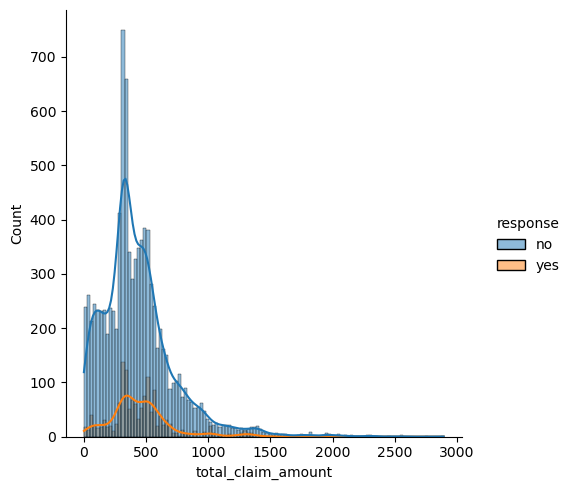

In [49]:
fg7 = sns.displot(x='total_claim_amount', hue = 'response', data=file3, kde=True)

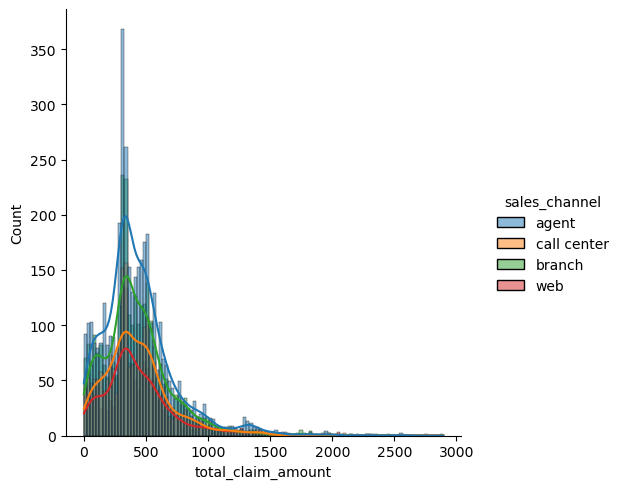

In [48]:
fg7 = sns.displot(x='total_claim_amount', hue = 'sales_channel', data=file3, kde=True)

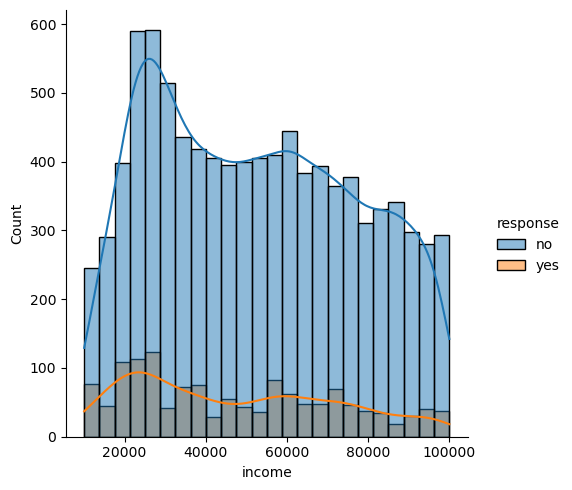

In [47]:
fg8 = sns.displot(x='income', hue = 'response', data=file3, kde=True)

In [58]:
pip install dython
conda install -c conda-forge dython
pip install git+https://github.com/shakedzy/dython.git`
    
import pandas as pd
from dython.nominal import associations

from dython.nominal import identify_nominal_columns
categorical_features=identify_nominal_columns(file3)
categorical_features

associations(file3, nominal_columns='auto', numerical_columns=None, mark_columns=False, nom_nom_assoc='cramer', 
num_num_assoc='pearson', bias_correction=True, nan_strategy=_REPLACE, nan_replace_value=_DEFAULT_REPLACE_VALUE, ax=None, 
figsize=None, annot=True, fmt='.2f', cmap=None, sv_color='silver', cbar=True, vmax=1.0, vmin=None, plot=True, 
compute_only=False, clustering=False, title=None, filename=None)

complete_correlation= associations(file3, filename= 'complete_correlation.png', figsize=(10,10))
file3_complete_corr=complete_correlation['corr']
file3_complete_corr.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

SyntaxError: invalid syntax (921380894.py, line 1)

In [ ]:
qualiatative and quantitative take homes and show in a different way